In [26]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Machine Learning/Dataset/Salary_Data.csv'

# Membaca file CSV menjadi DataFrame'
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [33]:
# Menghapus kolom yang tidak diperlukan
df_cleaned = df[['Years of Experience', 'Salary']]

# Menampilkan DataFrame baru yang telah dihapus kolom yang tidak diperlukan
print(df_cleaned)


      Years of Experience    Salary
0                     5.0   90000.0
1                     3.0   65000.0
2                    15.0  150000.0
3                     7.0   60000.0
4                    20.0  200000.0
...                   ...       ...
6699                 20.0  200000.0
6700                  3.0   50000.0
6701                  4.0   55000.0
6702                 14.0  140000.0
6703                  1.0   35000.0

[6698 rows x 2 columns]


In [34]:
# Contoh menggantikan NaN dengan nilai median
X = df['Years of Experience'].fillna(df['Years of Experience'].median()).values.reshape(-1, 1)

# Menggantikan nilai NaN dalam kolom 'Years of Experience' dengan nilai median dari kolom tersebut. fillna() digunakan untuk mengisi nilai yang hilang.
df.dropna(inplace=True)
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Menghapus baris yang mengandung setidaknya satu nilai NaN dari DataFrame df. Variabel input (X) dan output (y) diambil dari DataFrame yang telah dihapus nilai NaN.
df.fillna(value=0, inplace=True)  # Menggantikan NaN dengan 0
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Menggantikan nilai NaN dalam seluruh DataFrame dengan nilai 0.
df['Years of Experience'] = df['Years of Experience'].astype(float)
df['Salary'] = df['Salary'].astype(float)
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

In [35]:
# Import library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Mean Squared Error: 825762905.7777966


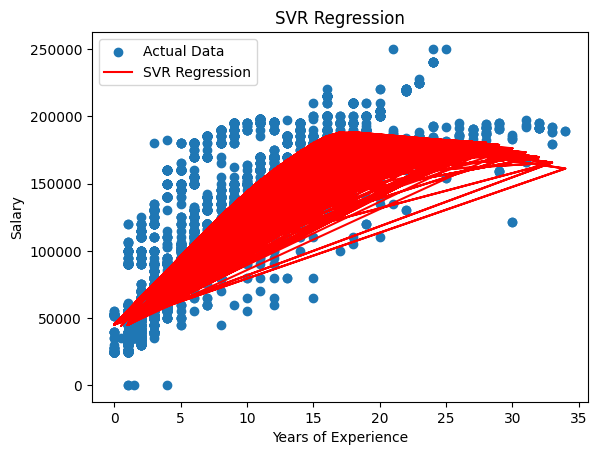

In [36]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 797621861.6095303


In [24]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

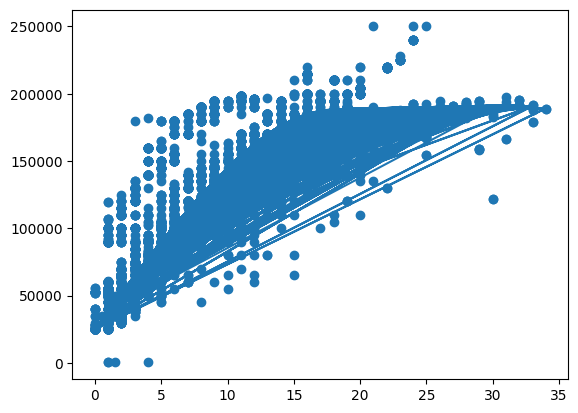

In [25]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))